## Project objective

Classify restaurant reviews as positive or negative with NLTK.

This is a sentiment analysis problem that we are trying to solve, where we aim to determine the sentiment of a given text, in this case, restaurant reviews, as either positive or negative. The use of the Natural Language Toolkit (NLTK) library is to facilitate this sentiment analysis task.

In [1]:
import pandas as pd
import numpy as np

reviews = pd.read_csv("/Users/brindhamanivannan/Desktop/NLP/Project 2 - Restaurant Reviews Prediction/Restaurant_Reviews.tsv", sep='\t', quoting=3)
reviews

# quoting parameter will avoid any issue related to double quotes in reviews text
# code to ignore double quotes is value 3

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


1 in LIked column is positive, 0 is negative review.

In [2]:
reviews['Liked'].value_counts()

1    500
0    500
Name: Liked, dtype: int64

The dataset appears to be a balanced dataset.

## Data Cleaning

### Step 1: Keep only the alphabets, remove numbers and punctuations

In [3]:
# import the necessary libraries

import re 
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/brindhamanivannan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


We will apply the steps of cleaning process to first review and then we will apply same to all reviews using for loop.

In [4]:
reviews['Review'][0] # first review

'Wow... Loved this place.'

In [5]:
reviews['Review'][1] # second review

'Crust is not good.'

In [7]:
review_1 = re.sub('[^a-zA-Z]','',reviews['Review'][0])
review_1

'WowLovedthisplace'

In [8]:
review_1 = re.sub('[^a-zA-Z]',' ',reviews['Review'][0]) # only keeping the letters in the review
review_1

'Wow    Loved this place '

### Step 2: Convert everything to lowercase

In [10]:
review_1 = re.sub('[^a-zA-Z]',' ',reviews['Review'][0])
review_1 = review_1.lower() # convert all the letters in lowercase
review_1

'wow    loved this place '

### Step 3: Removing the stopwords

By removing these words, we remove the low-level information from our text in order to give more focus to the important information.

In [11]:
review_1 = re.sub('[^a-zA-Z]',' ',reviews['Review'][0])
review_1 = review_1.lower() # convert all the letters in lowercase
review_1

'wow    loved this place '

In [12]:
type(review_1)

str

In [13]:
review_1 = review_1.split() # we have to split the words to go through all the words
review_1

['wow', 'loved', 'this', 'place']

In [14]:
type(review_1)

list

In [15]:
review_1 = [word for word in review_1 if not word in set(stopwords.words('english'))] 
# removed stop words

review_1

['wow', 'loved', 'place']

### Step 4: Stemming

In [16]:
ps = PorterStemmer() # object of class PorterStemmer
review_1 = [ps.stem(word) for word in review_1 if not word in set(stopwords.words('english'))] # taking all the words in review except stop words
review_1

# Stemming applied

['wow', 'love', 'place']

### Step 5: Join the tokens

In [17]:
review_1

['wow', 'love', 'place']

In [18]:
review_1 = ' '.join(review_1)
review_1

'wow love place'

In [19]:
type(review_1)

str

### Step 6: Apply text data cleaning to all the reviews in dataset using for loop

In [20]:
corpus = [] # define an empty list

for i in range(0, 1000): # index locations 0 to 1000
  all_reviews = re.sub('[^a-zA-Z]',' ',reviews['Review'][i]) # replace 0 by i 
  all_reviews = all_reviews.lower() # convert all the letters in lowercase
  all_reviews = all_reviews.split() # split the words
  ps = PorterStemmer() # object of class PorterStemmer
  all_reviews = [ps.stem(word) for word in all_reviews if not word in set(stopwords.words('english'))] # taking all the words in review except stop words
  all_reviews = ' '.join(all_reviews)
  corpus.append(all_reviews)

In [21]:
corpus

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place worth time let alon vega',
 'like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow',
 'found place acc

In [22]:
len(corpus)

1000

## Feature Engineering on text data

The goal of feature engineering is to capture the meaning and context of the text, which can help the model to better understand and classify the sentiment expressed in the text. Feature engineering is an iterative process and requires domain knowledge, experimentation and a deep understanding of the problem to achieve the best results.

Feature engineering is the process of creating new features or transforming existing ones to extract more information from data in order to improve the performance of machine learning models in sentiment analysis problem. The features used for sentiment analysis can range from simple word count or n-grams, to more complex features such as sentiment scores of words or phrases, and the use of word embeddings.

## Bag of Words model

Bag of Words (BoW) is a simple but powerful model used in natural language processing for representing text data. The model converts a collection of text documents into numerical features by counting the frequency of words in each document.

In the BoW model, a text document is represented as a vector of word frequencies, where each dimension of the vector corresponds to a specific word in a predefined vocabulary. The value in each dimension is the number of times the word appears in the document.

The BoW model ignores the grammar and order of words in a document and focuses only on the presence or absence of words. This makes it easy to use with traditional machine learning algorithms, but also leads to loss of information about the context of words. Despite its simplicity, the BoW model is still widely used in many NLP tasks, including sentiment analysis, text classification, and information retrieval.

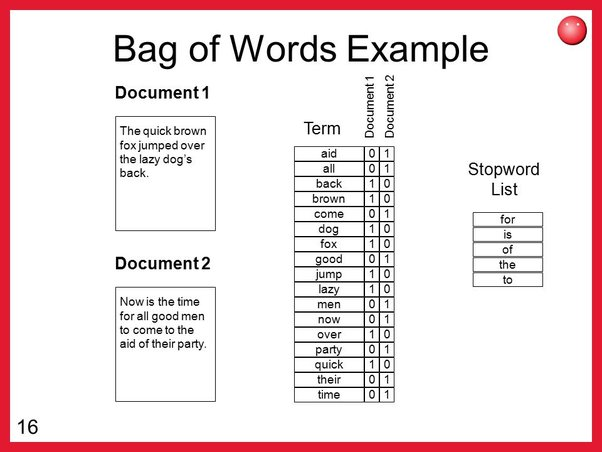

## Vector Representation

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1500) # keep 1500 most frequent words
cv

CountVectorizer(max_features=1500)

In [24]:
x = cv.fit_transform(corpus).toarray()
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [25]:
x.shape # 1000 reviews and 1500 most frequent words

(1000, 1500)

In [26]:
# label
# dependent variable

y = reviews.iloc[:, 1].values # selecting column 'liked' as dependent variable to train ML model
y

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,

## Splitting the dataset into train and test set

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)

In [28]:
x_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [29]:
x_train.shape

(800, 1500)

In [30]:
x_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [31]:
x_test.shape

(200, 1500)

In [32]:
y_train

array([1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,

In [33]:
y_train.shape

(800,)

In [34]:
y_test

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1])

In [35]:
y_test.shape

(200,)

## Model training using Naive Bayes

In [36]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

## Predict the test set results


In [37]:
y_pred = classifier.predict(x_test)
y_pred

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1])

## Confusion matrix

In [38]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# confusion_matrix
confusion_matrix(y_test, y_pred)

array([[55, 42],
       [12, 91]])

## Classification report



In [39]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.57      0.67        97
           1       0.68      0.88      0.77       103

    accuracy                           0.73       200
   macro avg       0.75      0.73      0.72       200
weighted avg       0.75      0.73      0.72       200



## Accuracy score

In [40]:
accuracy_score(y_test, y_pred)


0.73

73% accuracy